## Wojciech Poniewierka 402224 EAIiIB AiR AGH
# Laboratory 5
<br><br><br>

In [7]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [8]:
og_df = pd.read_csv("Airline_data.csv")
og_df.head(10)

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [9]:
model_ppc=CmdStanModel(stan_file='model_p.stan')

R = 1000

data_sim = {'N': len(og_df), 
            'x': og_df["Miles flown [100 mln miles]"].values / 1000, # divide by 1000 so values can be higher 
            'mu_a': np.log(og_df['Fatal accidents'].mean()),
            'sig_a': np.log(og_df['Fatal accidents'].std()),
            'mu_t': 0.04,
            'sig_t': 0.006}
sim=model_ppc.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=21,refresh=R)

df = sim.draws_pd()
df.head(5)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10]
0,0.0,0.0,3.99502,0.038841,57.0,59.0,64.0,60.0,56.0,62.0,68.0,76.0,72.0,67.0
1,0.0,0.0,2.89594,0.050655,17.0,28.0,21.0,26.0,26.0,22.0,29.0,27.0,33.0,28.0
2,0.0,0.0,3.12092,0.039294,25.0,24.0,22.0,39.0,23.0,28.0,22.0,31.0,30.0,24.0
3,0.0,0.0,5.53027,0.044198,291.0,295.0,315.0,331.0,318.0,315.0,314.0,328.0,360.0,319.0
4,0.0,0.0,5.40564,0.035166,253.0,245.0,271.0,268.0,264.0,261.0,303.0,253.0,260.0,260.0


count    1000.000000
mean       94.149000
std       221.570748
min         0.000000
25%         9.000000
50%        30.000000
75%        83.250000
max      2742.000000
Name: y[1], dtype: float64
count    1000.000000
mean      103.072000
std       245.193888
min         0.000000
25%        10.000000
50%        31.500000
75%        89.000000
max      3046.000000
Name: y[6], dtype: float64
count    1000.000000
mean      107.068000
std       252.963764
min         0.000000
25%        10.000000
50%        34.000000
75%        92.250000
max      3076.000000
Name: y[10], dtype: float64


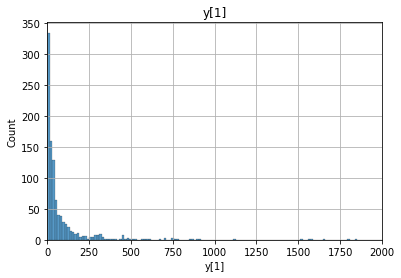

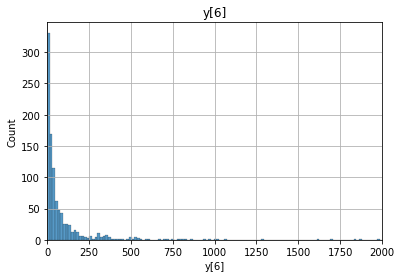

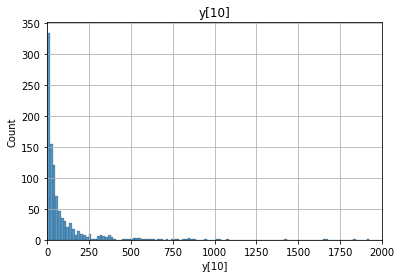

In [10]:
sns.histplot(data=df, x=df['y[1]'])
plt.xlim(0, 2000)
plt.grid()
plt.title("y[1]")
print(df['y[1]'].describe())

plt.figure()
sns.histplot(data=df, x=df['y[6]'])
plt.xlim(0, 2000)
plt.grid()
plt.title("y[6]")
print(df['y[6]'].describe())

plt.figure()
sns.histplot(data=df, x=df['y[10]'])
plt.xlim(0, 2000)
plt.grid()
plt.title("y[10]")
print(df['y[10]'].describe())

#### Posterior


In [11]:
model_ppc=CmdStanModel(stan_file='model.stan')

R = 1000

data_sim = {'N': len(og_df), 
            'x': og_df["Miles flown [100 mln miles]"].values / 1000, # divide by 1000 so values can be higher
            'y': og_df["Fatal accidents"].values,
            'mu_a': np.log(og_df['Fatal accidents'].mean()),
            'sig_a': np.log(og_df['Fatal accidents'].std()),
            'mu_t': 0.04,
            'sig_t': 0.006}
sim=model_ppc.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=21,refresh=R)

df2 = sim.draws_pd()
df2.head(5)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,theta,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,0.0,0.0,-0.080043,0.124275,3.0,4.0,2.0,5.0,2.0,1.0,2.0,3.0,3.0,1.0
1,0.0,0.0,-0.080043,0.124275,1.0,0.0,3.0,1.0,0.0,1.0,3.0,2.0,4.0,0.0
2,0.0,0.0,-0.080043,0.124275,0.0,0.0,3.0,1.0,5.0,0.0,4.0,0.0,1.0,4.0
3,0.0,0.0,-0.080043,0.124275,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0
4,0.0,0.0,-0.080043,0.124275,5.0,2.0,0.0,1.0,2.0,1.0,2.0,6.0,0.0,3.0


count    1000.000000
mean        1.441000
std         1.198313
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: y_pred[1], dtype: float64
count    1000.000000
mean        1.931000
std         1.357233
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: y_pred[6], dtype: float64
count    1000.000000
mean        2.208000
std         1.536586
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: y_pred[10], dtype: float64


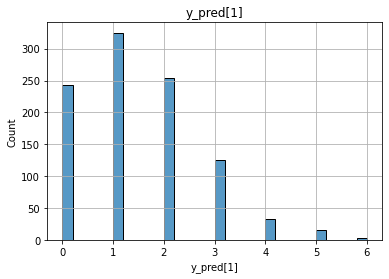

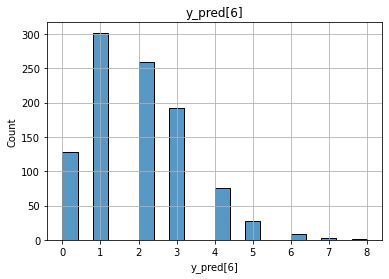

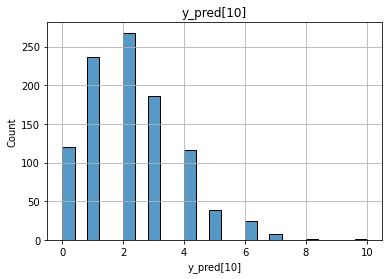

In [12]:
sns.histplot(data=df2, x=df2['y_pred[1]'])
plt.grid()
plt.title("y_pred[1]")
print(df2['y_pred[1]'].describe())

plt.figure()
sns.histplot(data=df2, x=df2['y_pred[6]'])
plt.grid()
plt.title("y_pred[6]")
print(df2['y_pred[6]'].describe())

plt.figure()
sns.histplot(data=df2, x=df2['y_pred[10]'])
plt.grid()
plt.title("y_pred[10]")
print(df2['y_pred[10]'].describe())